## Output Prediction using Machine Learning (Simple Linear Regression)

### Importing pandas, LinearRegression, and other required imports

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle

### Importing and Cleaning the Data from CSV

In [2]:
train_data = pd.read_csv('train.csv')

train_data_cleaned = train_data.dropna(subset=['x', 'y'])

print(train_data_cleaned.head())

      x          y
0  24.0  21.549452
1  50.0  47.464463
2  15.0  17.218656
3  38.0  36.586398
4  87.0  87.288984


### Splitting the Data into x and y 's

In [3]:
X_train = train_data_cleaned[['x']]
y_train = train_data_cleaned['y']

### Creating the Simple Linear Regressor Model

In [4]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Saving the Model using pickle

In [5]:
model_filename = 'linear_regression_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(model, model_file)

with open('x_mean.pkl', 'wb') as mean_file:
    pickle.dump(X_train.mean(), mean_file)
with open('x_std.pkl', 'wb') as std_file:
    pickle.dump(X_train.std(), std_file)

### Load the Test Dataset

In [6]:
test_data = pd.read_csv('test.csv')
print(test_data.head())

    x          y
0  77  79.775152
1  21  23.177279
2  22  25.609262
3  20  17.857388
4  36  41.849864


### Splitting the Test data

In [7]:
X_test = test_data[['x']]
y_test_actual = test_data['y']

### Predicting the target variable (y) and evaluating the model performance

In [8]:
y_test_pred = model.predict(X_test)
mse = mean_squared_error(y_test_actual, y_test_pred)
r2 = r2_score(y_test_actual, y_test_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 9.43292219203931
R-squared (R2): 0.9888014444327563


### Visualizing the Regression line

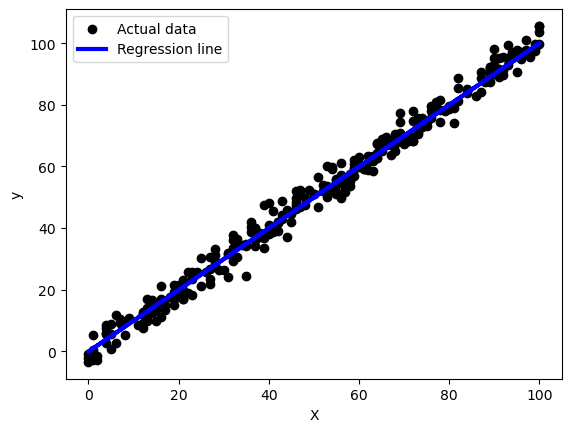

In [9]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test_actual, color='black', label='Actual data')
plt.plot(X_test, y_test_pred, color='blue', linewidth=3, label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## Predicting the values of x's and y's on the user input

In [12]:
import pickle

model_filename = 'linear_regression_model.pkl'
with open(model_filename, 'rb') as model_file:
    loaded_model = pickle.load(model_file)

def predict_y_from_x(x_value):
    x_value = float(x_value)
    predicted_y = loaded_model.predict([[x_value]])[0]
    return predicted_y

def predict_x_from_y(y_value):
    y_value = float(y_value)
    predicted_x = (y_value - loaded_model.intercept_) / loaded_model.coef_[0]
    return predicted_x

### Main function taking user input and giving the output:

In [13]:
def main():
    user_input_type = input("Enter 'x' or 'y': ").lower()

    if user_input_type == 'x':
        user_input_value = input("Enter the 'x' value: ")
        predicted_y = predict_y_from_x(user_input_value)
        print(f"Predicted 'y' value: {predicted_y}")

    elif user_input_type == 'y':
        user_input_value = input("Enter the 'y' value: ")
        predicted_x = predict_x_from_y(user_input_value)
        print(f"Predicted 'x' value: {predicted_x}")

    else:
        print("Invalid input. Please enter 'x' or 'y'.")

if __name__ == "__main__":
    main()


Predicted 'x' value: 1.362671031759601
